<h2><center>Final Project: Where it Pays to Attend College</center></h2>

<h3><center>By Ansh Vanam and Rishi Mullangi<center></h3>

<h2>Introduction</h2>

For our final project, we have decided to work with a dataset that contains salaries of various colleges based on major, type of school (private, public), and region. The dataset we chose has three separate CSV files, "salaries-by-college-type.csv", "salaries-by-region.csv", and "degrees-that-pay-back.csv". These CSV files contain data from graduating up to their mid-career, including percentiles ranging from 10-90. 

Using these CSV files, we plan to look into how these variables affect the salaries of students, and how these factors can affect choices of students looking to go into college. Our first step is to download the CSV files from this Kaggle dataset, created by the Wall Street Journal:

https://www.kaggle.com/datasets/wsj/college-salaries/code?resource=download&select=salaries-by-college-type.csv

From here, we can download the three CSV files and import them into our code editor. Then, we use pandas to create dataframes out of the CSV files. 

Note: Ensure you have the following python libraries installed on your system and the CSV files downloaded to run the tutorial.

Pandas documentation - https://pandas.pydata.org/docs/ 

Seaborn documentation - https://seaborn.pydata.org

Numpy documentation - https://numpy.org/doc/ 

Matplotlib documentation - https://matplotlib.org/stable/index.html 

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as stm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

The first table we're looking at is salaries-by-college-type, which details the names of various colleges as well as their School Type. In the next python block we will work on cleaning the data and making it more useable. First, we need to change the values to floats so that we can do operations on them. 

In [61]:
df_by_colleges = pd.read_csv('salaries-by-college-type.csv')
#Getting rid of all of the NaN values and replacing them with 0 to make calculations doable.
#df1 = df1.fillna(0)

#Getting rid of $ signs as well as commas so that we can convert values to floats. 
for (columnName, columnData) in df_by_colleges.iteritems():
    df_by_colleges[columnName] = df_by_colleges[columnName].str.replace('$','')
    df_by_colleges[columnName] = df_by_colleges[columnName].str.replace(',', '')
df_by_colleges = df_by_colleges.astype({'Starting Median Salary':'float', 'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 'Mid-Career 25th Percentile Salary':'float',
'Mid-Career 75th Percentile Salary':'float', 'Mid-Career 90th Percentile Salary':'float'})

print(df_by_colleges.dtypes)

#Might want better names here, I couldn't think of anything for now. 
df_by_colleges = df_by_colleges.rename(columns = {'School Name':'School_Name','School Type':'School_Type','Starting Median Salary':'Starting_Median_Salary', 'Mid-Career Median Salary':'Mid-Career_Median_Salary', 'Mid-Career 10th Percentile Salary':'Mid-Career_10th_Percentile_Salary',
'Mid-Career 25th Percentile Salary':'Mid-Career_25th_Percentile_Salary', 'Mid-Career 75th Percentile Salary':'Mid-Career_75th_Percentile_Salary', 'Mid-Career 90th Percentile Salary':'Mid-Career_90th_Percentile_Salary'})
df_by_colleges.head()

School Name                           object
School Type                           object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object


C:\Users\RishiMain\AppData\Local\Temp\ipykernel_23308\445889727.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_by_colleges[columnName] = df_by_colleges[columnName].str.replace('$','')


,School_Name,School_Type,Starting_Median_Salary,Mid-Career_Median_Salary,Mid-Career_10th_Percentile_Salary,Mid-Career_25th_Percentile_Salary,Mid-Career_75th_Percentile_Salary,Mid-Career_90th_Percentile_Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,Polytechnic University of New York Brooklyn,Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


Now that we've cleaned up our first table by converting the values that are numerical to floats, we can move on to the next table, 'degrees-that-pay-back.csv', which details undergraduate major's median starting salary in relation to their undergraduate major, mid-career median salary, and other useful information that we can use later on in the tutorial. 

In [67]:
df_by_major = pd.read_csv('degrees-that-pay-back.csv')
#Getting rid of all of the NaN values and replacing them with 0 to make calculations doable.
#df_by_major = df_by_major.fillna(0)

#Changing all of the columns to floats (Where required)
for (columnName, columnData) in df_by_major.iteritems():
    if(columnName == 'Percent change from Starting to Mid-Career Salary'): continue
    df_by_major[columnName] = df_by_major[columnName].str.replace('$','')
    df_by_major[columnName] = df_by_major[columnName].str.replace(',', '')
df_by_major = df_by_major.astype({'Starting Median Salary':'float', 'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 'Mid-Career 25th Percentile Salary':'float',
'Mid-Career 75th Percentile Salary':'float', 'Mid-Career 90th Percentile Salary':'float'})

print(df_by_major.dtypes)

df_by_major.head()

Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percentile Salary                    float64
Mid-Career 90th Percentile Salary                    float64
dtype: object


C:\Users\RishiMain\AppData\Local\Temp\ipykernel_23308\549433403.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_by_major[columnName] = df_by_major[columnName].str.replace('$','')


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


Finally, we can look at the last CSV file, 'salaries-by-region.csv', which details college graduate salaries by region and college.

In [71]:
df_by_region = pd.read_csv('salaries-by-region.csv')
#Getting rid of all of the NaN values and replacing them with 0 to make calculations doable.
#df_by_region = df_by_region.fillna(0)

#Converting numerical columns to float values.
for (columnName, columnData) in df_by_region.iteritems():
    if(columnName == 'Percent change from Starting to Mid-Career Salary'): continue
    df_by_region[columnName] = df_by_region[columnName].str.replace('$','')
    df_by_region[columnName] = df_by_region[columnName].str.replace(',', '')
df_by_region = df_by_region.astype({'Starting Median Salary':'float', 'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 'Mid-Career 25th Percentile Salary':'float',
'Mid-Career 75th Percentile Salary':'float', 'Mid-Career 90th Percentile Salary':'float'})


print(df_by_region.dtypes)
df_by_region.head()

School Name                           object
Region                                object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object


C:\Users\RishiMain\AppData\Local\Temp\ipykernel_23308\4237166587.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_by_region[columnName] = df_by_region[columnName].str.replace('$','')


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,University of California Berkeley,California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


<h2>Data Management/Representation</h2>
Next, we will represent various data from the dataframes to try and understand the tables more, and focus our tutorial. These graphs will provide a visual understanding of what all the dataframes represent.

First, we want to understand the relationship between region and starting median salary, to see if the region has a heavy effect on new graduates' salaries. To do this, we can create a simple bar graph that will display the median salary ranges of the various regions. 

[]

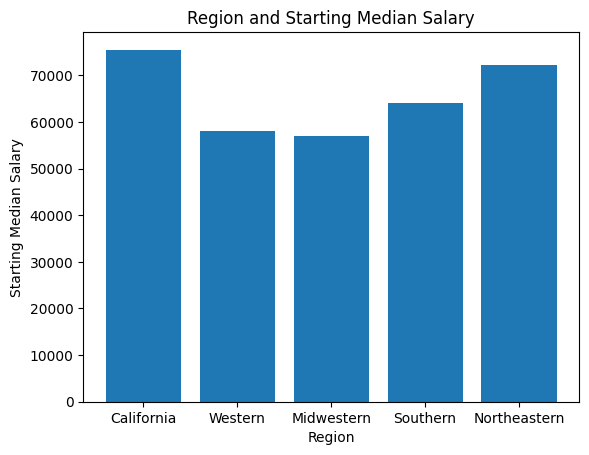

In [72]:
#plt.figure(figsize = (10,7))
plt.title('Region and Starting Median Salary')
plt.xlabel('Region')
plt.ylabel('Starting Median Salary')
plt.bar(df_by_region['Region'], df_by_region['Starting Median Salary'])
plt.plot()

In [32]:
df_by_region['Region'].nunique()

5

In [33]:
len(df_by_region['School Name'].unique())

320

In [34]:
df_by_region[df_by_region['School Name'] == 'Massachusetts Institute of Technology (MIT)']

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
222,Massachusetts Institute of Technology (MIT),Northeastern,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"


In [35]:
df_by_colleges[df_by_colleges['School_Name'] == 'Massachusetts Institute of Technology (MIT)']

,School_Name,School_Type,Starting_Median_Salary,Mid-Career_Median_Salary,Mid-Career_10th_Percentile_Salary,Mid-Career_25th_Percentile_Salary,Mid-Career_75th_Percentile_Salary,Mid-Career_90th_Percentile_Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"


In [36]:
df_by_region

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,"$38,000.00","$70,300.00","$35,100.00","$51,200.00","$100,000.00","$179,000.00"
316,Niagara University,Northeastern,"$36,900.00","$69,700.00","$44,000.00","$57,000.00","$92,000.00","$128,000.00"
317,State University of New York (SUNY) at Fredonia,Northeastern,"$37,800.00","$66,200.00","$32,800.00","$44,200.00","$93,300.00","$181,000.00"
318,University of Southern Maine,Northeastern,"$39,400.00","$63,600.00","$40,400.00","$47,900.00","$85,700.00","$117,000.00"
